# 项目：分析鸢尾花种类数据

## 分析目标

此数据分析报告的目的是基于鸢尾花的属性数据，分析两种鸢尾花萼片、花瓣的长度和宽度平均值，是否存在显著性差异，让我们可以对不同种类鸢尾花的属性特征进行推断。

## 简介

原始数据`Iris.csv`包括两种鸢尾花，每种有 50 个样本，以及每个样本的一些属性，包括萼片的长度和宽度、花瓣的长度和宽度。

`Iris.csv`每列的含义如下：
- Id：样本的ID。
- SepalLengthCm：萼片的长度（单位为厘米）。
- SepalWidthCm：萼片的宽度（单位为厘米）。
- PetalLengthCm：花瓣的长度（单位为厘米）。
- PetalWidthCm：花瓣的宽度（单位为厘米）。
- Species：鸢尾花种类。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ori_iri=pd.read_csv("Iris.csv")
ori_iri

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


## 结构性清理

结构完整

## 内容清理

In [3]:
cleaned_iri=ori_iri.copy()

In [4]:
cleaned_iri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             100 non-null    int64  
 1   SepalLengthCm  100 non-null    float64
 2   SepalWidthCm   100 non-null    float64
 3   PetalLengthCm  100 non-null    float64
 4   PetalWidthCm   100 non-null    float64
 5   Species        100 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 4.8+ KB


无空缺值，将Id改为字符串类型，Species改为分类数据

In [5]:
cleaned_iri["Id"]=cleaned_iri["Id"].astype(str)
cleaned_iri["Species"]=cleaned_iri["Species"].astype("category")

### 重复数据处理

In [6]:
cleaned_iri["Id"].duplicated().sum()

np.int64(0)

无重复数据

### 不一致数据处理

In [7]:
cleaned_iri["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Name: count, dtype: int64

无不一致数据

### 无效数据处理

In [8]:
cleaned_iri.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.094000,2.862000,0.785000
std,0.641698,0.476057,1.448565,0.566288
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.400000,3.050000,2.450000,0.800000
75%,5.900000,3.400000,4.325000,1.300000
max,7.000000,4.400000,5.100000,1.800000


无无效数据

## 数据整理

In [12]:
setosa_datas=cleaned_iri.query("Species=='Iris-setosa'")
versicolor_datas=cleaned_iri.query("Species=='Iris-versicolor'")

In [13]:
setosa_datas.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
versicolor_datas.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor


## 数据初步探索

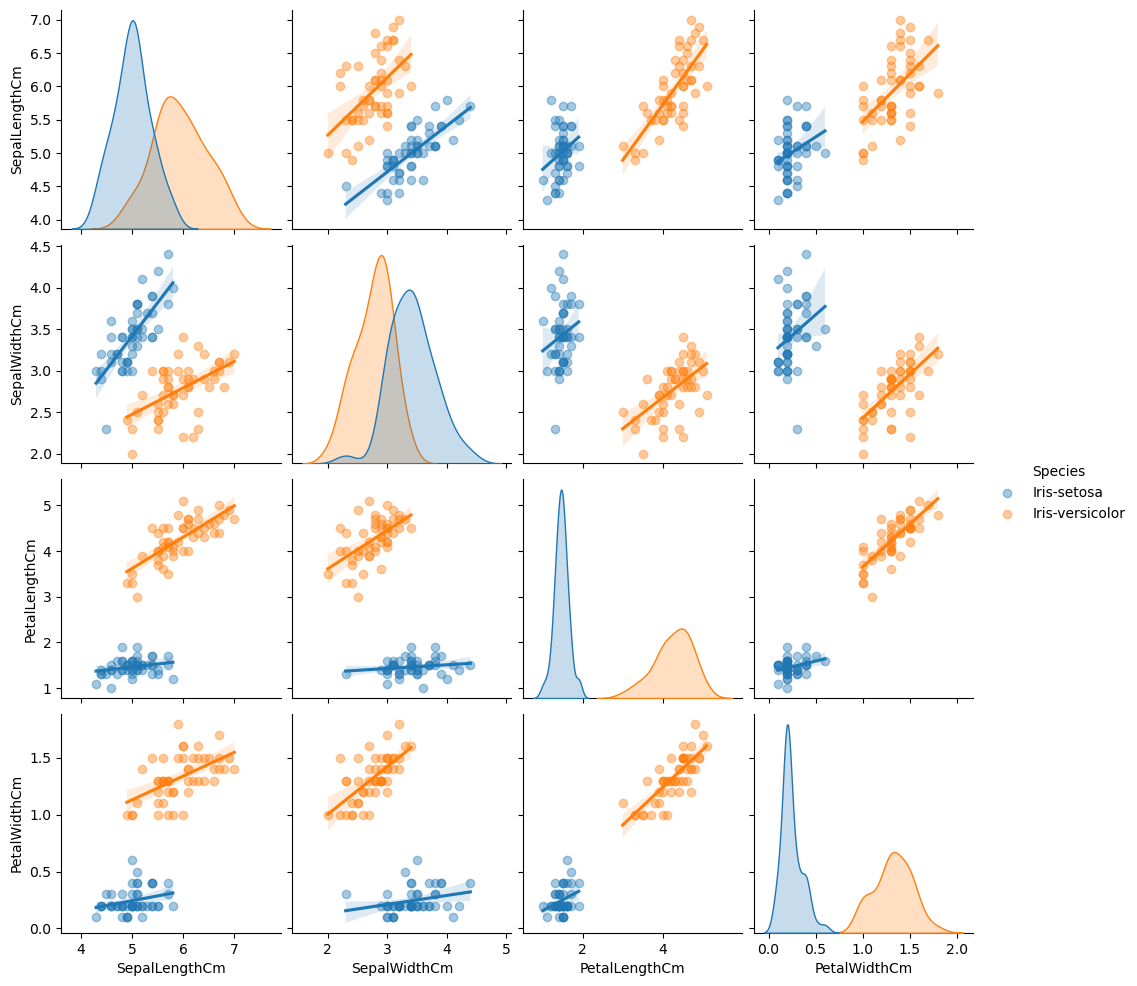

In [16]:
sns.pairplot(cleaned_iri,hue="Species",kind="reg",plot_kws={"scatter_kws":{"alpha":0.4}})
plt.show()

两个种类的花瓣长度和宽度存在显著差异，萼片长度宽度可能存在差异

## 数据分析

In [17]:
from scipy.stats import ttest_ind 

### 萼片长度分析

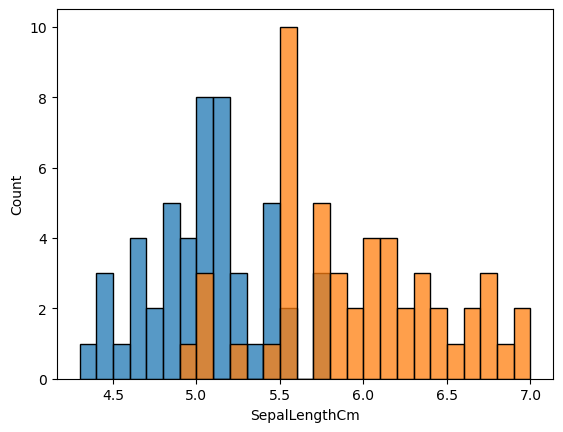

In [18]:
sns.histplot(setosa_datas["SepalLengthCm"],binwidth=0.1)
sns.histplot(versicolor_datas["SepalLengthCm"],binwidth=0.1)
plt.show()

### 建立假设

-$H_0$：两种鸢尾花不存在显著差异

-$H_1$：两种鸢尾花存在显著差异

### 确认单双尾

为双尾检验

### 确认显著水平

设显著水平为0.05

### 计算t值和p值

In [19]:
t_stat,p_value=ttest_ind(setosa_datas["SepalLengthCm"],versicolor_datas["SepalLengthCm"])
print(t_stat,p_value)

-10.52098626754911 8.985235037487079e-18


由于p远小于0.05，故拒绝原假设，萼片长度存在显著差异

### 萼片宽度分析

In [20]:
t_stat,p_value=ttest_ind(setosa_datas["SepalWidthCm"],versicolor_datas["SepalWidthCm"])
print(t_stat,p_value)

9.282772555558111 4.362239016010214e-15


由于p远小于0.05，故拒绝原假设，萼片宽度存在显著差异

### 花瓣长度分析

In [21]:
t_stat,p_value=ttest_ind(setosa_datas["PetalLengthCm"],versicolor_datas["PetalLengthCm"])
print(t_stat,p_value)

-39.46866259397272 5.717463758170621e-62


由于p远小于0.05，故拒绝原假设，花片长度存在显著差异

### 花瓣宽度分析

In [22]:
t_stat,p_value=ttest_ind(setosa_datas["PetalWidthCm"],versicolor_datas["PetalWidthCm"])
print(t_stat,p_value)

-34.01237858829048 4.589080615710866e-56


由于p远小于0.05，故拒绝原假设，花片宽度存在显著差异

## 结论

经过推论统计学的计算，两种鸢尾花在萼片长宽及花瓣长宽上均存在明显差异